In [1]:
#importing all the basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib as mpt
%matplotlib inline
import matplotlib.pyplot as plt
#load data into pandas datframe to see the structure of the data and analyze it
#skipping completely balnk lines and ignoring the lines with not having proper format
amex_data = pd.read_csv('C:/Users/bnaveen3/Desktop/AV/train.csv',skip_blank_lines=True,
                      error_bad_lines=False)
#Loading historical logics to check if this is useful
amex_hist_log=pd.read_csv('C:/Users/bnaveen3/Desktop/AV/historical_user_logs.csv',skip_blank_lines=True,
                      error_bad_lines=False)

In [2]:
AMEX_TRAIN_DATA=amex_data
#total count is 463291
print('total unique session ids-',len(AMEX_TRAIN_DATA['session_id'].unique()))
#here total session ids and unique session ids are same..so we can say session id as an primary key.
print('number of record with no clicks',AMEX_TRAIN_DATA[AMEX_TRAIN_DATA['is_click']==0]['session_id'].count())
print('number of sessions with clicks',AMEX_TRAIN_DATA[AMEX_TRAIN_DATA['is_click']==1]['session_id'].count())
print('percenatge of sessions clicked on ads is ',(31331/431960)*100,'%')
AMEX_TRAIN_DATA.head()

total unique session ids- 463291
number of record with no clicks 431960
number of sessions with clicks 31331
percenatge of sessions clicked on ads is  7.253217890545422 %


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [3]:
def check_for_null_values(AMEX_TRAIN_DATA):
    #check if there is any data missing
    for i in AMEX_TRAIN_DATA.columns:
        print('Null Data in column ',i,
              AMEX_TRAIN_DATA[AMEX_TRAIN_DATA[i].isna()]['user_id'].count())
    


In [4]:
#looking at the above data...for now dropping product_category_2 and city_developement_index
#as we dont know if there is no actual value or data fetching issue
AMEX_TRAIN_DATA=AMEX_TRAIN_DATA.drop(['product_category_2','city_development_index','session_id'],axis=1)

In [5]:
import datetime
#datetime.AMEX_TRAIN_DATA['DateTime']
datetime.date.today()
a=datetime.datetime.strptime(AMEX_TRAIN_DATA['DateTime'][0], "%Y-%m-%d %H:%M")
a.month

7

In [6]:
a=pd.to_datetime(AMEX_TRAIN_DATA['DateTime'])
AMEX_TRAIN_DATA['day']=a.dt.day
AMEX_TRAIN_DATA['month']=a.dt.month
AMEX_TRAIN_DATA.drop(['DateTime'],axis=1,inplace=True)
AMEX_TRAIN_DATA.head()

,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,var_1,is_click,day,month
0,858557,C,359520,13787,4,10.0,Female,4.0,3.0,0,0,2,7
1,243253,C,105960,11085,5,8.0,Female,2.0,2.0,0,0,2,7
2,243253,C,359520,13787,4,8.0,Female,2.0,2.0,0,0,2,7
3,1097446,I,359520,13787,3,3.0,Male,3.0,3.0,1,0,2,7
4,663656,C,405490,60305,3,2.0,Male,2.0,3.0,1,0,2,7


In [7]:
product_dummies=pd.get_dummies(AMEX_TRAIN_DATA['product'],prefix='is_product')
campaign_id_dummies=pd.get_dummies(AMEX_TRAIN_DATA['campaign_id'],prefix='is_cmapaign_id')
webpage_id_dummies=pd.get_dummies(AMEX_TRAIN_DATA['webpage_id'],prefix='is_webpage_id')
product_category_1_dummies=pd.get_dummies(AMEX_TRAIN_DATA['product_category_1'],prefix='is_product_category_1')
user_group_id_dummies=pd.get_dummies(AMEX_TRAIN_DATA['user_group_id'],prefix='is_user_group_id')
gender_dummies=pd.get_dummies(AMEX_TRAIN_DATA['gender'],prefix='is_gender')
user_depth_dummies=pd.get_dummies(AMEX_TRAIN_DATA['user_depth'],prefix='is_user_depth')
age_level_dummies=pd.get_dummies(AMEX_TRAIN_DATA['age_level'],prefix='age_level')
month_dummies=pd.get_dummies(AMEX_TRAIN_DATA['month'],prefix='month')
day_dummies=pd.get_dummies(AMEX_TRAIN_DATA['day'],prefix='day')

In [8]:
AMEX_TRAIN_DATA.head()
AMEX_TRAIN_DATA.drop(['product','user_id','campaign_id','webpage_id','month','day','age_level','product_category_1','user_group_id','gender','user_depth'],axis=1,inplace=True)

In [9]:
AMEX_TRAIN_DATA[product_dummies.columns]=product_dummies
AMEX_TRAIN_DATA[campaign_id_dummies.columns]=campaign_id_dummies
AMEX_TRAIN_DATA[webpage_id_dummies.columns]=webpage_id_dummies
AMEX_TRAIN_DATA[product_category_1_dummies.columns]=product_category_1_dummies
AMEX_TRAIN_DATA[user_group_id_dummies.columns]=user_group_id_dummies
AMEX_TRAIN_DATA[gender_dummies.columns]=gender_dummies
AMEX_TRAIN_DATA[user_depth_dummies.columns]=user_depth_dummies
AMEX_TRAIN_DATA[age_level_dummies.columns]=age_level_dummies
AMEX_TRAIN_DATA[month_dummies.columns]=month_dummies
AMEX_TRAIN_DATA[day_dummies.columns]=day_dummies

In [56]:
AMEX_TRAIN_DATA.columns

Index(['user_id', 'var_1', 'is_click', 'is_product_A', 'is_product_B',
       'is_product_C', 'is_product_D', 'is_product_E', 'is_product_F',
       'is_product_G', 'is_product_H', 'is_product_I', 'is_product_J',
       'is_cmapaign_id_82320', 'is_cmapaign_id_98970', 'is_cmapaign_id_105960',
       'is_cmapaign_id_118601', 'is_cmapaign_id_359520',
       'is_cmapaign_id_360936', 'is_cmapaign_id_396664',
       'is_cmapaign_id_404347', 'is_cmapaign_id_405490',
       'is_cmapaign_id_414149', 'is_webpage_id_1734', 'is_webpage_id_6970',
       'is_webpage_id_11085', 'is_webpage_id_13787', 'is_webpage_id_28529',
       'is_webpage_id_45962', 'is_webpage_id_51181', 'is_webpage_id_53587',
       'is_webpage_id_60305', 'is_product_category_1_1',
       'is_product_category_1_2', 'is_product_category_1_3',
       'is_product_category_1_4', 'is_product_category_1_5',
       'is_user_group_id_0.0', 'is_user_group_id_1.0', 'is_user_group_id_2.0',
       'is_user_group_id_3.0', 'is_user_group_id_4

In [10]:
#check_for_null_values(AMEX_TRAIN_DATA)
#pd.unique(AMEX_TRAIN_DATA['user_id'])
AMEX_TRAIN_DATA.head()

,var_1,is_click,is_product_A,is_product_B,is_product_C,is_product_D,is_product_E,is_product_F,is_product_G,is_product_H,...,age_level_4.0,age_level_5.0,age_level_6.0,month_7,day_2,day_3,day_4,day_5,day_6,day_7
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
AMEX_TRAIN_DATA, AMEX_TEST_DATA = train_test_split(AMEX_TRAIN_DATA, test_size=0.1)
AMEX_TRAIN_TARGET=AMEX_TRAIN_DATA['is_click']
AMEX_TRAIN_FEAT =AMEX_TRAIN_DATA.drop(['is_click'],axis=1)
AMEX_TEST_TARGET=AMEX_TEST_DATA['is_click']
AMEX_TEST_FEAT =AMEX_TEST_DATA.drop(['is_click'],axis=1)

In [12]:

AMEX_TRAIN_FEAT.fillna(0,inplace=True)
#check_for_null_values(AMEX_TRAIN_FEAT)
AMEX_TEST_FEAT.fillna(0,inplace=True)


In [79]:
#Fit the model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)
model.fit(AMEX_TRAIN_FEAT,AMEX_TRAIN_TARGET)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
model.score(AMEX_TEST_FEAT,AMEX_TEST_TARGET)

0.9313403842003022

417397    0
175845    0
310959    0
141598    1
221654    0
107203    1
175797    0
211191    1
2273      0
348692    1
67712     1
370876    0
137655    0
294499    1
229381    1
348681    1
387170    1
257744    0
453856    0
19299     0
182459    0
165512    0
57229     0
413525    0
113173    0
264282    0
158118    0
169397    0
211936    0
368855    0
         ..
276979    0
34541     1
31482     0
139877    0
275419    0
276506    0
343682    1
242491    1
202309    1
312574    0
6478      0
447981    0
110146    1
159098    0
343690    0
114820    0
258977    0
146173    1
185747    1
450330    0
421916    1
434638    1
164599    1
56694     1
442721    0
283540    1
89125     1
34322     1
345640    1
47837     0
Name: var_1, Length: 416961, dtype: int64

In [115]:
model.predict_proba(AMEX_TEST_FEAT)[0:100]
#model.decision_path(AMEX_TEST_FEAT)
a=model.predict(AMEX_TEST_FEAT)
len(a[a==0])

46269

In [123]:
[i[1] for i in model.predict_proba(AMEX_TEST_FEAT) ]

[0.05,
 0.0,
 0.05,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.15,
 0.0,
 0.0,
 0.05,
 0.05,
 0.05,
 0.1,
 0.0,
 0.15,
 0.0,
 0.05,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.2,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.15,
 0.0,
 0.1,
 0.05,
 0.2,
 0.1,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.05,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.05,
 0.25,
 0.0,
 0.1,
 0.05,
 0.2,
 0.1,
 0.1,
 0.15,
 0.0,
 0.1,
 0.0,
 0.0,
 0.15,
 0.05,
 0.1,
 0.05,
 0.0,
 0.15,
 0.0,
 0.0,
 0.0,
 0.25,
 0.25,
 0.05,
 0.05,
 0.0,
 0.0,
 0.0,
 0.2,
 0.05,
 0.0,
 0.0,
 0.0,
 0.15,
 0.1,
 0.1,
 0.15,
 0.1,
 0.0,
 0.1,
 0.0,
 0.15,
 0.05,
 0.2,
 0.0,
 0.05,
 0.0,
 0.0,
 0.15,
 0.3,
 0.0,
 0.1,
 0.0,
 0.15,
 0.05,
 0.0,
 0.0,
 0.05,
 0.25,
 0.0,
 0.0,
 0.25,
 0.25,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05,
 0.0,
 0.05,
 0.05,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.15,
 0.05,
 0.0,
 0.15,
 0.25,
 0.05,
 0.0,
 0.0,
 0.0,
 0.1,
 0.5,
 0.0,
 0.0,
 0.1,
 0.05,
 0.05,
 0.05,
 0.05,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0

In [82]:
#print(AMEX_TEST_FEAT.columns)
model.feature_importances_
fi=pd.DataFrame(model.feature_importances_*100,index=AMEX_TEST_FEAT.columns,columns=['importance'])
fi.sort_values('importance',ascending=False)

,importance
var_1,13.436278
is_user_depth_3.0,5.203295
is_user_depth_2.0,4.681292
day_2,4.288246
day_5,4.272088
day_6,4.160443
day_7,4.067723
day_4,4.035918
day_3,3.892158
is_user_depth_1.0,3.648020


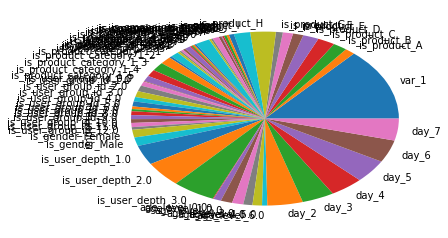

In [92]:
fi['importance'].plot.pie()

In [14]:
#np.cov(AMEX_TRAIN_FEAT['product'],AMEX_TRAIN_TARGET)
#plt.scatter(amex_data['product'],amex_data['is_click'])


In [19]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=2,leaf_size=100)
model_knn.fit(AMEX_TRAIN_FEAT,AMEX_TRAIN_TARGET)

KNeighborsClassifier(algorithm='auto', leaf_size=100, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
model_knn.score(AMEX_TEST_FEAT,AMEX_TEST_TARGET)

0.928815022663501